In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df=pd.read_csv('/content/me_cfs_vs_depression_dataset.csv')
df.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


In [ ]:
df.isna().sum()

,0
age,0
gender,0
sleep_quality_index,47
brain_fog_level,48
physical_pain_score,34
stress_level,48
depression_phq9_score,22
fatigue_severity_scale_score,21
pem_duration_hours,24
hours_of_sleep_per_night,21


In [ ]:
df.fillna(df.mean(numeric_only=True),inplace=True)

In [ ]:
df.isna().sum()

,0
age,0
gender,0
sleep_quality_index,0
brain_fog_level,0
physical_pain_score,0
stress_level,0
depression_phq9_score,0
fatigue_severity_scale_score,0
pem_duration_hours,0
hours_of_sleep_per_night,0


In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0])

In [ ]:
df.isna().sum()

,0
age,0
gender,0
sleep_quality_index,0
brain_fog_level,0
physical_pain_score,0
stress_level,0
depression_phq9_score,0
fatigue_severity_scale_score,0
pem_duration_hours,0
hours_of_sleep_per_night,0


In [ ]:
# Correctly encode the target variable first
target_encoder = LabelEncoder()
df['diagnosis'] = target_encoder.fit_transform(df['diagnosis'])

In [ ]:
feature_encoder = LabelEncoder()
object_cols = ['gender','work_status', 'social_activity_level', 'exercise_frequency', 'meditation_or_mindfulness']

for col in object_cols:
    df[col] = feature_encoder.fit_transform(df[col])

In [ ]:
df.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,1,8.7,3.9,9.2,8.100000,10.0,6.5,9.0,7.7,0,2,1,0,1,1
1,69,1,1.3,9.9,4.2,9.900000,20.0,7.0,41.0,8.4,1,2,1,2,1,0
2,46,0,4.0,5.4,4.8,5.459139,24.0,1.6,13.0,6.9,0,1,5,3,1,1
3,32,0,9.4,2.1,2.9,3.800000,10.0,6.8,11.0,7.5,0,0,0,1,1,1
4,60,0,7.6,7.5,6.4,8.500000,17.0,7.0,46.0,3.1,1,0,1,3,0,0


In [ ]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']
print(X.shape)
print(y.shape)

(1000, 15)
(1000,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
# 1. Initialize the scaler
scaler = StandardScaler()
# 2. Fit on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# 3. Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
print(f"Original X_train: {X_train_scaled.shape}")
print(f"Resampled X_train: {X_resampled.shape}")

Original X_train: (900, 15)
Resampled X_train: (1077, 15)


In [ ]:
model=LogisticRegression(class_weight='balanced')
model.fit(X_resampled, y_resampled)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
model_score=model.score(X_test_scaled,y_test)
print(model_score)

0.96


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       1.00      1.00      1.00        47
           2       0.93      0.97      0.95        38

    accuracy                           0.96       100
   macro avg       0.95      0.92      0.94       100
weighted avg       0.96      0.96      0.96       100



Confusion Matrix:


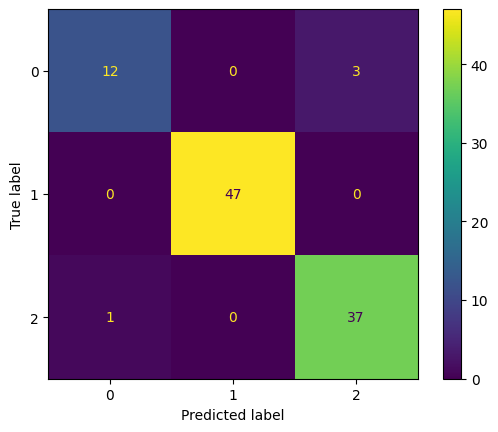

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9655555555555555
Test Accuracy: 0.96


In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

 Accuracy: 0.99
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      1.00      1.00        47
           2       0.97      1.00      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.98       100
weighted avg       0.99      0.99      0.99       100



Confusion Matrix:


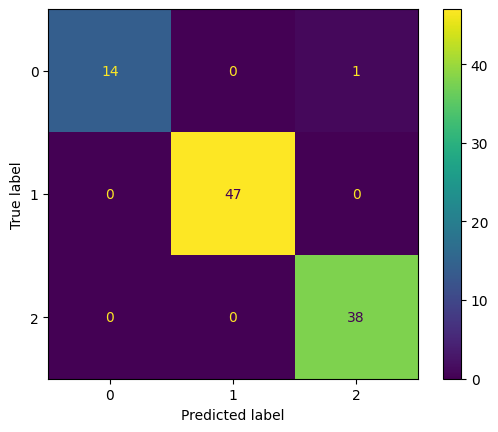

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()